In [1]:
import pandas as pd
import numpy as np
data =  pd.read_csv('datasets/titanic/train.csv')

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
a = pd.Series(name.split(',')[0] for name in data['Name'])
a.value_counts()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Length: 667, dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

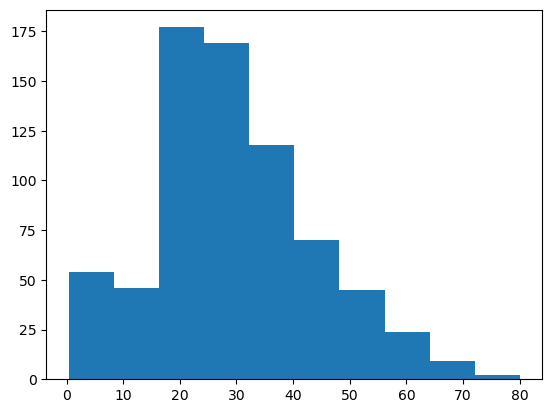

In [4]:
import matplotlib.pyplot as plt
plt.hist(data['Age'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.corrwith(data['Survived'])

C:\Users\user\AppData\Local\Temp\ipykernel_7716\2977326345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corrwith(data['Survived'])


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

In [7]:
X = data.drop('Survived', axis = 1)

In [8]:
y = data['Survived']

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits = 1, test_size = 0.1, random_state = 42)
for train_index, test_index in splitter.split(data, data['Sex']):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y .iloc[test_index]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

def bucketize(feat):
    out = pd.cut(feat[:,0], bins = [i for i in range(int(feat.min()-1),int(feat.max()),int(feat.max()/9))] + [np.inf], labels = [i for i in range(1,11)])
    out = np.reshape(out, (out.shape[0],1))
    return(out)
normal_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), FunctionTransformer(bucketize, feature_names_out='one-to-one'), StandardScaler())
pipeline_2 = make_pipeline(StandardScaler(), FunctionTransformer(feature_names_out = 'one-to-one'))
pipeline_3 = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())
preprocessing = ColumnTransformer([('category', normal_pipeline, ['Age']), ('category2', normal_pipeline, ['Fare']), ('set2', pipeline_2, ['Pclass', 'SibSp', 'Parch']), 
                                  ('encode', pipeline_3, ['Sex', 'Embarked'])], remainder = 'drop')

In [13]:
a = preprocessing.fit_transform(X_train)

In [14]:
a = pd.DataFrame(a, columns = preprocessing.get_feature_names_out())


In [15]:
X_train.iloc[a[a['category2__Fare'].isna() ==  True].index]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [16]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors = 4)
KNC.fit(a, y_train)

KNeighborsClassifier(n_neighbors=4)

In [34]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
recall_score(y_train, cross_val_predict(KNC, a, y_train, cv=4))

0.6084142394822006

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNC, a, y_train, cv = 4, scoring = 'accuracy')

array([0.80099502, 0.8       , 0.795     , 0.82      ])

In [20]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
cross_val_score(dummy, a, y_train, cv = 4, scoring = 'accuracy')

array([0.6119403, 0.615    , 0.615    , 0.615    ])

In [38]:
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(KNC, a, y_train, cv=4)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, pred)
cm

array([[428,  64],
       [107, 202]], dtype=int64)

In [24]:
y_train.value_counts()

0    492
1    309
Name: Survived, dtype: int64

In [25]:
from sklearn.ensemble  import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(a, y_train)

RandomForestClassifier()

In [35]:
cross_val_score(rfc, a, y_train, cv=4, scoring='precision')

array([0.75      , 0.80645161, 0.725     , 0.78571429])

In [65]:
pred = cross_val_predict(KNC, a, y_train, cv=4, method = 'predict_proba')
scores = pred[:, 1]
pred1 = cross_val_predict(KNC, a, y_train, cv=4, method = 'predict_proba')
scores1 = pred[:, 1]

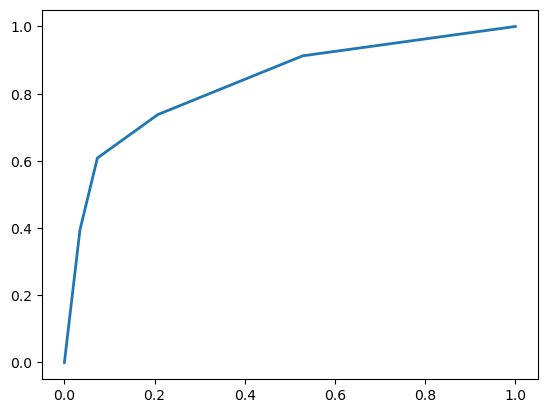

In [77]:
from sklearn.metrics import roc_curve, precision_recall_curve
fpr, tpr, threshold = roc_curve(y_train, scores1)
prec, rec, thresh = precision_recall_curve(y_train, scores1)
idx = (rec <= 0.90).argmax()
thresh_90 = thresh[idx]
plt.plot(fpr, tpr, linewidth = 2, label = 'roc_curve')

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, scores)

0.8324519167521773

In [83]:
thresh_90

0.5